In [5]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display


In [6]:
clean_data = pd.read_excel('csdm.xlsx')
type1 = pd.read_excel('../Datasets/Shanghai_T1DM_Summary.xlsx')
type2 = pd.read_excel('../Datasets/Shanghai_T2DM_Summary.xlsx')

In [7]:
# Load the dataset
cd1 = clean_data

In [8]:
cd1 

,Patient Number,"Gender (Female=1, Male=2)",Age (years),Height (m),Weight (kg),BMI (kg/m2),Smoking History (pack year),Alcohol Drinking History (drinker/non-drinker),Type of Diabetes,Acute Diabetic Complications,...,Triglyceride (mmol/L),High-Density Lipoprotein Cholesterol (mmol/L),Low-Density Lipoprotein Cholesterol (mmol/L),Creatinine (umol/L),Estimated Glomerular Filtration Rate (ml/min/1.73m2),Uric Acid (mmol/L),Blood Urea Nitrogen (mmol/L),Hypoglycemia (yes/no),Merge 2-hour Postprandial insulin (pmol/L),Merge DoD (years)
0,1001_0_20210730,1.0,66.0,1.50,60.0,26.666667,0.0,non-drinker,T1DM,none,...,1.02,0.86,2.01,37.30,160.00,188.86,6.47,no,390.36,10.000000
1,1002_0_20210504,2.0,68.0,1.70,63.0,21.799308,50.0,drinker,T1DM,diabetic ketoacidosis,...,2.20,0.93,3.28,66.80,109.00,342.57,6.05,yes,754.71,26.000000
2,1002_1_20210521,2.0,68.0,1.70,67.0,23.183391,50.0,drinker,T1DM,diabetic ketoacidosis,...,2.20,0.93,3.28,69.40,104.00,322.18,3.06,yes,754.71,26.000000
3,1002_2_20210909,2.0,68.0,1.70,65.0,22.491349,50.0,drinker,T1DM,none,...,1.82,0.84,1.83,63.70,115.00,342.34,6.21,yes,74.39,26.000000
4,1003_0_20210831,2.0,37.0,1.90,60.0,16.620499,0.0,non-drinker,T1DM,diabetic ketoacidosis,...,1.14,1.08,3.95,49.60,174.00,93.39,1.85,yes,390.36,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2096_0_20201116,1.0,60.0,1.57,65.0,26.370238,0.0,non-drinker,T2DM,none,...,0.93,2.06,3.65,63.06,118.95,321.66,5.90,no,307.47,0.100000
122,2097_0_20201116,1.0,71.0,1.70,66.8,23.114187,0.0,non-drinker,T2DM,none,...,2.21,1.48,3.89,72.00,73.00,369.00,5.90,no,307.47,20.000000
123,2098_0_20201106,1.0,64.0,1.60,67.0,26.171875,0.0,non-drinker,T2DM,none,...,1.69,1.17,3.07,63.06,118.95,321.66,5.90,no,307.47,0.100000
124,2099_0_20201116,1.0,44.0,1.52,67.0,28.999307,0.0,non-drinker,T2DM,none,...,1.69,1.17,3.07,63.06,118.95,321.66,5.90,no,307.47,0.100000


In [9]:
# Displaying the columns of cd1
print("Columns of cd1:")
print(cd1.columns)



Columns of cd1:
Index(['Patient Number', 'Gender (Female=1, Male=2)', 'Age (years)',
       'Height (m)', 'Weight (kg)', 'BMI (kg/m2)',
       'Smoking History (pack year)',
       'Alcohol Drinking History (drinker/non-drinker)', 'Type of Diabetes',
       'Acute Diabetic Complications', 'Diabetic Macrovascular  Complications',
       'Diabetic Microvascular Complications', 'Comorbidities',
       'Hypoglycemic Agents', 'Other Agents', 'Fasting Plasma Glucose (mg/dl)',
       '2-hour Postprandial Plasma Glucose (mg/dl)',
       'Fasting C-peptide (nmol/L)', '2-hour Postprandial C-peptide (nmol/L)',
       'Fasting Insulin (pmol/L)', 'HbA1c (mmol/mol)', 'Glycated Albumin (%)',
       'Total Cholesterol (mmol/L)', 'Triglyceride (mmol/L)',
       'High-Density Lipoprotein Cholesterol (mmol/L)',
       'Low-Density Lipoprotein Cholesterol (mmol/L)', 'Creatinine (umol/L)',
       'Estimated Glomerular Filtration Rate  (ml/min/1.73m2) ',
       'Uric Acid (mmol/L)', 'Blood Urea Nitrogen (mm

In [10]:
cd1.iloc[:, 7]

0      non-drinker
1          drinker
2          drinker
3          drinker
4      non-drinker
          ...     
121    non-drinker
122    non-drinker
123    non-drinker
124    non-drinker
125            NaN
Name: Alcohol Drinking History (drinker/non-drinker), Length: 126, dtype: object

In [11]:
print(cd1.dtypes)

Patient Number                                             object
Gender (Female=1, Male=2)                                 float64
Age (years)                                               float64
Height (m)                                                float64
Weight (kg)                                               float64
BMI (kg/m2)                                               float64
Smoking History (pack year)                               float64
Alcohol Drinking History (drinker/non-drinker)             object
Type of Diabetes                                           object
Acute Diabetic Complications                               object
Diabetic Macrovascular  Complications                      object
Diabetic Microvascular Complications                       object
Comorbidities                                              object
Hypoglycemic Agents                                        object
Other Agents                                               object
Fasting Pl

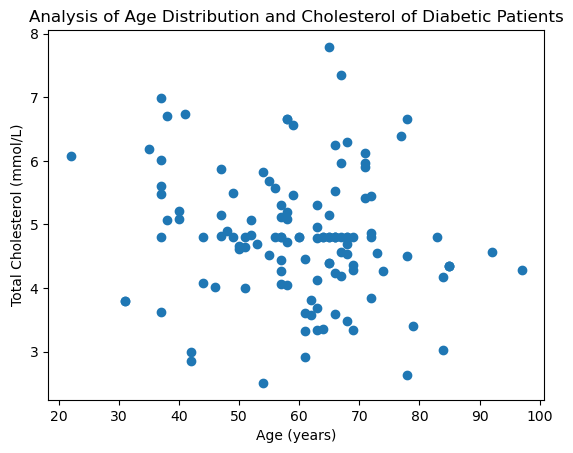

In [12]:
#Looking for coorelations between different columns. 
#In this example its a comparison of age factor vs total cholesterol.

plt.scatter(cd1.iloc[:,2],cd1.iloc[:,22])
plt.xlabel('Age (years)')
plt.ylabel('Total Cholesterol (mmol/L)')
plt.title('Analysis of Age Distribution and Cholesterol of Diabetic Patients')
plt.savefig('scatteragecholesterol.png')
plt.show()

#Seems to be a average of 5mmol/L of Cholesterol in Diabetic Patients

In [13]:
# Define mapping of merged categories to new labels for Microvascular Complications
mapping = {
    'neuropathy, retinopathy': 'Neuropathy and Retinopathy',
    'neuropathy, retinopathy, nephropathy': 'Neuropathy, Retinopathy, and Nephropathy',
    'neuropathy': 'Neuropathy',
    'none': 'Not Present in Patient',
    'nephropathy': 'Nephropathy',
    'retinopathy': 'Retinopathy',
    'nephropathy, neuropathy, retinopathy': 'Nephropathy, Neuropathy, and Retinopathy',
    'nephropathy, neuropathy': 'Nephropathy and Neuropathy'
}

# Merge the existing categories into a new column
cd1['Microvascular Complications'] = cd1['Diabetic Microvascular Complications'].map(mapping)

# Check the unique values in the new column
print(cd1['Microvascular Complications'].unique())


['Neuropathy and Retinopathy' 'Neuropathy, Retinopathy, and Nephropathy'
 'Neuropathy' 'Not Present in Patient' 'Nephropathy' 'Retinopathy'
 'Nephropathy, Neuropathy, and Retinopathy' 'Nephropathy and Neuropathy'
 nan]


In [14]:
# Define a function to merge and relabel the categories
def merge_mic(cat):
    if cat == 'Neuropathy, Retinopathy, and Nephropathy' or cat == 'Nephropathy, Neuropathy, and Retinopathy':
        return 'Neuropathy, Retinopathy, and Nephropathy'
    else:
        return cat

# Apply the function to the 'Merged Microvascular Complications' column to create the merged column
cd1['Microvascular Complications'] = cd1['Microvascular Complications'].apply(merge_mic)

# Check the unique values in the new column
print(cd1['Microvascular Complications'].unique())

['Neuropathy and Retinopathy' 'Neuropathy, Retinopathy, and Nephropathy'
 'Neuropathy' 'Not Present in Patient' 'Nephropathy' 'Retinopathy'
 'Nephropathy and Neuropathy' nan]


In [15]:
# Body Mass Index (BMI) Category: A new feature based on BMI ranges.

def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal Weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

cd1['BMI Category'] = cd1['BMI (kg/m2)'].apply(categorize_bmi)


In [16]:
#cd1['BMI Category'] = cd1['BMI Category'].apply(['Underweight', 'Normal Weight', 'Overweight', 'Obese'])

In [17]:
#Total Daily Insulin Dose: Utilizing data on both fasting and postprandial insulin levels, we can calculate the total daily insulin dose:
#First convert to float or int, then run calculation.

cd1['Fasting Insulin (pmol/L)'] = pd.to_numeric(cd1['Fasting Insulin (pmol/L)'], errors='coerce')
cd1['Merge 2-hour Postprandial insulin (pmol/L)'] = pd.to_numeric(cd1['Merge 2-hour Postprandial insulin (pmol/L)'], errors='coerce')
cd1['Total Daily Insulin Dose (pmol/L)'] = (cd1['Fasting Insulin (pmol/L)'] + cd1['Merge 2-hour Postprandial insulin (pmol/L)']) * 24

In [18]:
# Separating data for male and female patients
male_data = cd1[cd1['Gender (Female=1, Male=2)'] == 2]
female_data = cd1[cd1['Gender (Female=1, Male=2)'] == 1]

In [19]:
# Calculating mean BMI for male and female patients to show functional use of gendered data.
mean_bmi_male = male_data['BMI (kg/m2)'].mean()
mean_bmi_female = female_data['BMI (kg/m2)'].mean()

print("Mean BMI for male patients:", mean_bmi_male)
print("Mean BMI for female patients:", mean_bmi_female)

Mean BMI for male patients: 23.74977607862903
Mean BMI for female patients: 23.688884664533493


In [20]:
# Define the desired order of categories
desired_order = ['Underweight', 'Normal Weight', 'Overweight', 'Obese']

# Convert the 'BMI Category' column to a categorical data type
cd1['BMI Category'] = pd.Categorical(cd1['BMI Category'], categories=desired_order, ordered=True)


C:\Users\revcr\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


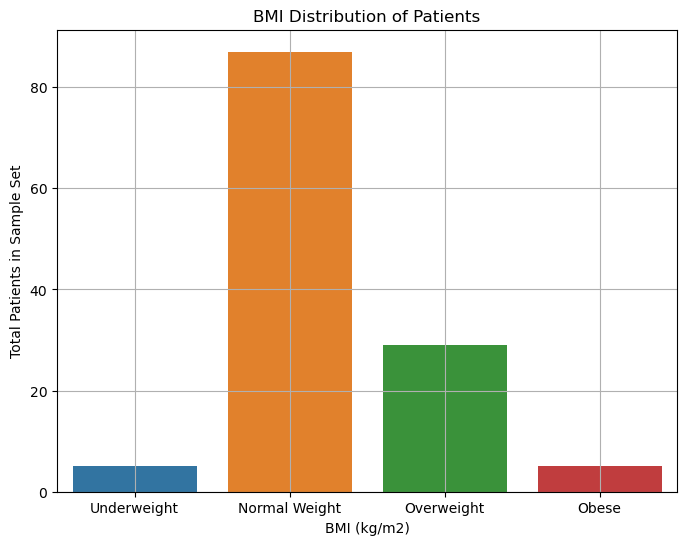

In [21]:
# Plotting BMI distribution

plt.figure(figsize=(8, 6))
sns.countplot(x='BMI Category', data=cd1, order=desired_order)
plt.title('BMI Distribution of Patients')
plt.xlabel('BMI (kg/m2)')
plt.ylabel('Total Patients in Sample Set')
plt.grid(True)
plt.savefig('bmidist.png')
plt.show()

C:\Users\revcr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\revcr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


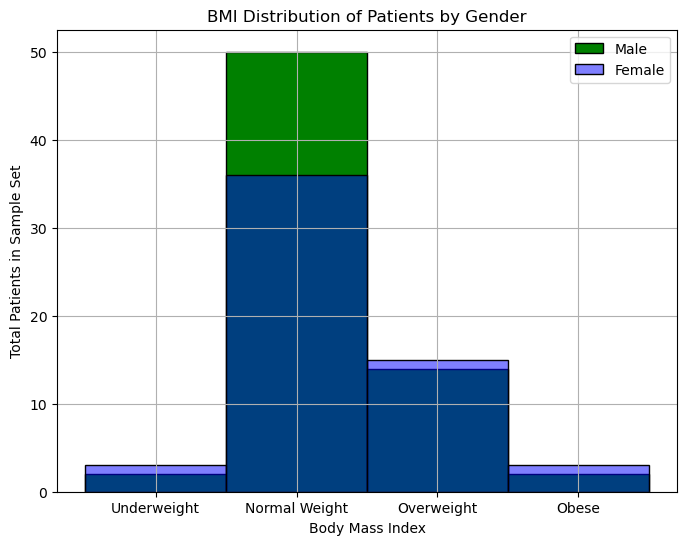

In [22]:
# Plotting BMI distribution for male and female patients
plt.figure(figsize=(8, 6))

# Sorting data
male_sorted = male_data['BMI Category'].sort_values(key=lambda x: pd.Categorical(x, categories=desired_order, ordered=True))
female_sorted = female_data['BMI Category'].sort_values(key=lambda x: pd.Categorical(x, categories=desired_order, ordered=True))

# Plotting sorted data
sns.histplot(male_sorted, bins=20, color='green', alpha=1, label='Male', edgecolor='black', stat='count', discrete=True)
sns.histplot(female_sorted, bins=20, color='blue', alpha=.50, label='Female', edgecolor='black', stat='count', discrete=True)

plt.title('BMI Distribution of Patients by Gender')
plt.xlabel('Body Mass Index')
plt.ylabel('Total Patients in Sample Set')
plt.legend()
plt.grid(True)
plt.xticks(ticks=np.arange(len(desired_order)), labels=desired_order)  # Manually setting x-axis labels
plt.savefig('bmidistgender.png')
plt.show()

In [23]:
# Sort the data by 'Hypoglycemia (yes/no)'
cd1_sorted = cd1.sort_values(by='Hypoglycemia (yes/no)')
cd1_sorted['Hypoglycemia (yes/no)'] = cd1_sorted['Hypoglycemia (yes/no)'].replace({'yes': 'Yes', 'no': 'No'})

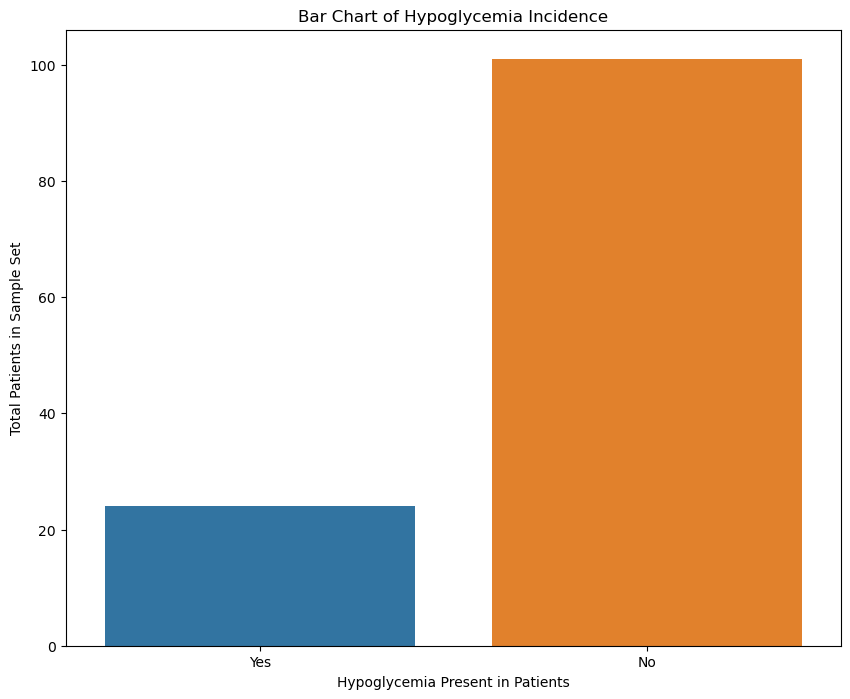

In [24]:
# Visualization 2: Bar Chart of Hypoglycemia Incidence
plt.figure(figsize=(10, 8))
sns.countplot(x='Hypoglycemia (yes/no)', data=cd1_sorted, order=['Yes', 'No'])
plt.title('Bar Chart of Hypoglycemia Incidence')
plt.ylabel('Total Patients in Sample Set')
plt.xlabel('Hypoglycemia Present in Patients')
plt.savefig('hypoglycemia.png')
plt.show()

In [25]:
cd1['Diabetic Microvascular Complications'].unique()

array(['neuropathy, retinopathy', 'neuropathy, retinopathy, nephropathy',
       'neuropathy', 'none', 'nephropathy', 'retinopathy',
       'nephropathy, neuropathy, retinopathy', 'nephropathy, neuropathy',
       nan], dtype=object)

In [26]:
mapping = {
    'neuropathy, retinopathy': 'Neuropathy and Retinopathy',
    'neuropathy, retinopathy, nephropathy': 'Neuropathy, Retinopathy, and Nephropathy',
    'neuropathy': 'Neuropathy',
    'none': 'Not Present in Patients',
    'nephropathy': 'Nephropathy',
    'retinopathy': 'Retinopathy',
    'nephropathy, neuropathy, retinopathy': 'Nephropathy, Neuropathy, and Retinopathy',
    'nephropathy, neuropathy': 'Nephropathy and Neuropathy'
}

# Merge the existing categories into a new column
cd1['Remapped Microvascular Complications'] = cd1['Diabetic Microvascular Complications'].map(mapping)

# Check the unique values in the new column
print(cd1['Remapped Microvascular Complications'].unique())

['Neuropathy and Retinopathy' 'Neuropathy, Retinopathy, and Nephropathy'
 'Neuropathy' 'Not Present in Patients' 'Nephropathy' 'Retinopathy'
 'Nephropathy, Neuropathy, and Retinopathy' 'Nephropathy and Neuropathy'
 nan]


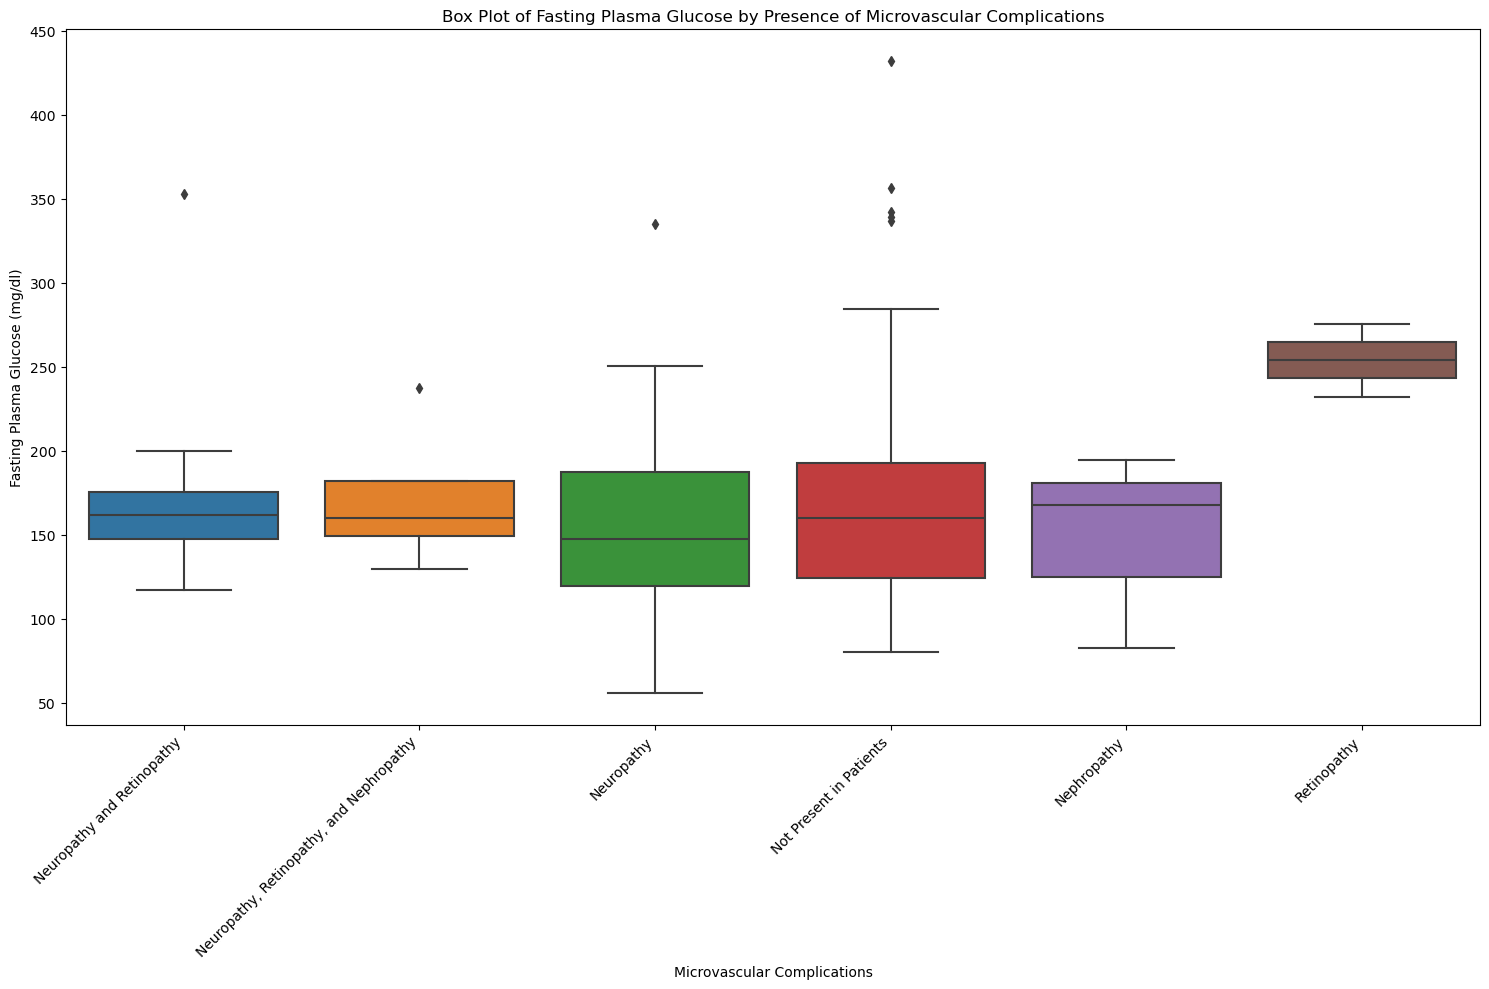

In [37]:
# Define a function to merge and relabel the categories
def merge_categories(category):
    if category == 'Neuropathy, Retinopathy, and Nephropathy' or category == 'Nephropathy, Neuropathy, and Retinopathy' or category == 'Nephropathy and Neuropathy':
        return 'Neuropathy, Retinopathy, and Nephropathy'
    else:
        return category

# Apply the function to the 'Diabetic Microvascular Complications' column to create the merged column
cd1['Microvascular Complications'] = cd1['Remapped Microvascular Complications'].apply(merge_categories)

plt.figure(figsize=(15, 10))
sns.boxplot(x='Microvascular Complications', y='Fasting Plasma Glucose (mg/dl)', data=cd1)
plt.title('Box Plot of Fasting Plasma Glucose by Presence of Microvascular Complications')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('boxplotfastingplasma.png')
plt.show()

# The whisker appearing on just the bottom of 'Neuropathy, Retinopathy, and Nephropathy' indicates the max value/s are closer to the mean
# and not far enough to be measured in a seperate quartile. Even though it still contains a single outlier on the high end.

C:\Users\revcr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\revcr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


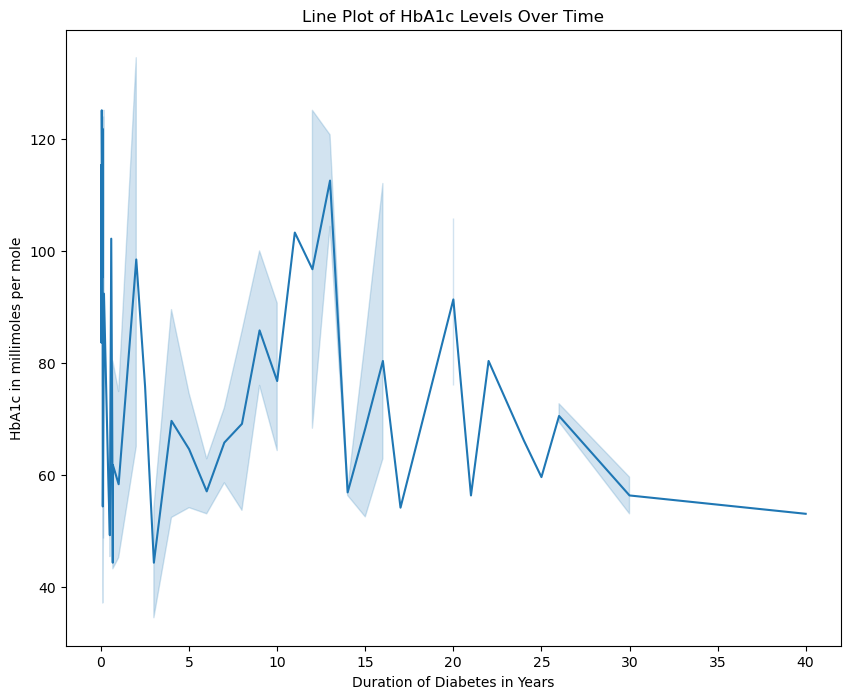

In [28]:
# Visualization 4: Line Plot of HbA1c Levels Over Time
plt.figure(figsize=(10, 8))
sns.lineplot(x='Merge DoD (years)', y='HbA1c (mmol/mol)', data=cd1)
plt.title('Line Plot of HbA1c Levels Over Time')
plt.xlabel('Duration of Diabetes in Years')
plt.ylabel('HbA1c in millimoles per mole')
plt.savefig('lineplothba1c.png')
plt.show()

#  This shading represents the variability of the data around the estimated line.
#  Meaning we could state that including confidence intervals can provide valuable information about the variability of the data 
#  and the reliability of the estimated trend.
#  If we would rather not then we can use 'errorbar=None' and it will remove the light blue shading 


In [29]:
# how to get the labels under BMI
# Find unique labels under the 'Category' column
unique_labels = cd1['Diabetic Macrovascular  Complications'].unique()

print("Unique labels under the 'Diabetic Macrovascular  Complications' column:")
print(unique_labels)

cd1['Diabetic Macrovascular  Complications'].value_counts()

Unique labels under the 'Diabetic Macrovascular  Complications' column:
['peripheral arterial disease, cerebrovascular disease'
 'coronary heart disease' 'none' 'peripheral arterial disease'
 'peripheral arterial disease, coronary heart disease'
 'coronary heart disease, peripheral arterial disease'
 'cerebrovascular disease' 'coronary heart disease  ' nan]


Diabetic Macrovascular  Complications
none                                                    78
peripheral arterial disease                             22
coronary heart disease                                  10
peripheral arterial disease, coronary heart disease      5
peripheral arterial disease, cerebrovascular disease     4
cerebrovascular disease                                  4
coronary heart disease, peripheral arterial disease      1
coronary heart disease                                   1
Name: count, dtype: int64

In [30]:
# Create a sample DataFrame with the given unique labels
# data = {'Diabetic Macrovascular Complications': ['peripheral arterial disease, cerebrovascular disease', 
#                                                  'coronary heart disease', 'none', 'peripheral arterial disease', 
#                                                  'peripheral arterial disease, coronary heart disease', 
#                                                  'coronary heart disease, peripheral arterial disease', 
#                                                  'cerebrovascular disease', 'coronary heart disease  ', 'nan']}
# df = pd.DataFrame(data)

# Define the mapping of old labels to new labels
replacement_mapping = {'peripheral arterial disease, cerebrovascular disease': 'Peri-Arterial & Cerebrovascular',
    'coronary heart disease': 'Coronary Heart Disease',
    'none': 'Not Present in Patient',
    'peripheral arterial disease': 'Peripheral Arterial Disease',
    'peripheral arterial disease, coronary heart disease': 'PAD & Coronary Heart Disease',
    'coronary heart disease, peripheral arterial disease': 'Coronary Heart Disease & PAD',
    'cerebrovascular disease': 'Cerebrovascular Disease',
    'coronary heart disease  ': 'Coronary Heart Disease',
    'nan': ''
}

# Replace the values in the DataFrame column using the mapping
cd1['Diabetic Macrovascular Complications'] = cd1['Diabetic Macrovascular  Complications'].replace(replacement_mapping)


In [31]:
# Define a function to merge and relabel the categories
def merge_cat(category):
    if category == 'PAD & Coronary Heart Disease' or category == 'Coronary Heart Disease & PAD':
        return 'Coronary Heart Disease & PAD'
    else:
        return category

# Apply the function to the 'Diabetic Macrovascular Complications' column to create the merged column
cd1['Merged Macrovascular Complications'] = cd1['Diabetic Macrovascular Complications'].apply(merge_cat)

# Check the unique values in the new column
print(cd1['Merged Macrovascular Complications'].unique())

['Peri-Arterial & Cerebrovascular' 'Coronary Heart Disease'
 'Not Present in Patient' 'Peripheral Arterial Disease'
 'Coronary Heart Disease & PAD' 'Cerebrovascular Disease' nan]


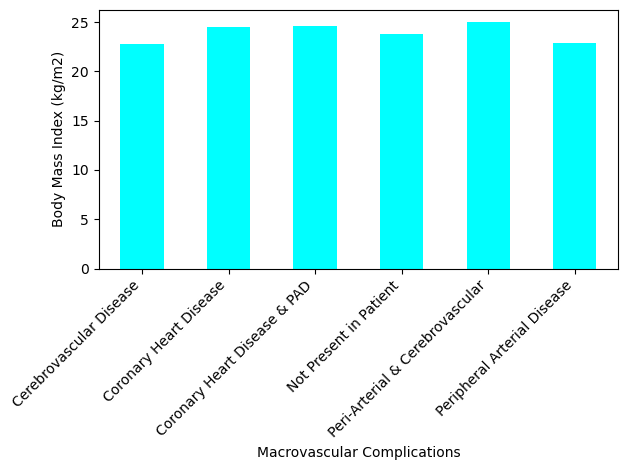

In [32]:
#Correlation Between BMI and Diabetic Macrovascular Complications: 
#Explore the correlation between BMI and the occurrence of macrovascular complications using a bar graph.
cd1.groupby('Merged Macrovascular Complications')['BMI (kg/m2)'].mean().plot(kind='bar', color='cyan')
plt.xlabel('Macrovascular Complications')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Body Mass Index (kg/m2)')
plt.tight_layout()
plt.savefig('bmidmc.png')

C:\Users\revcr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


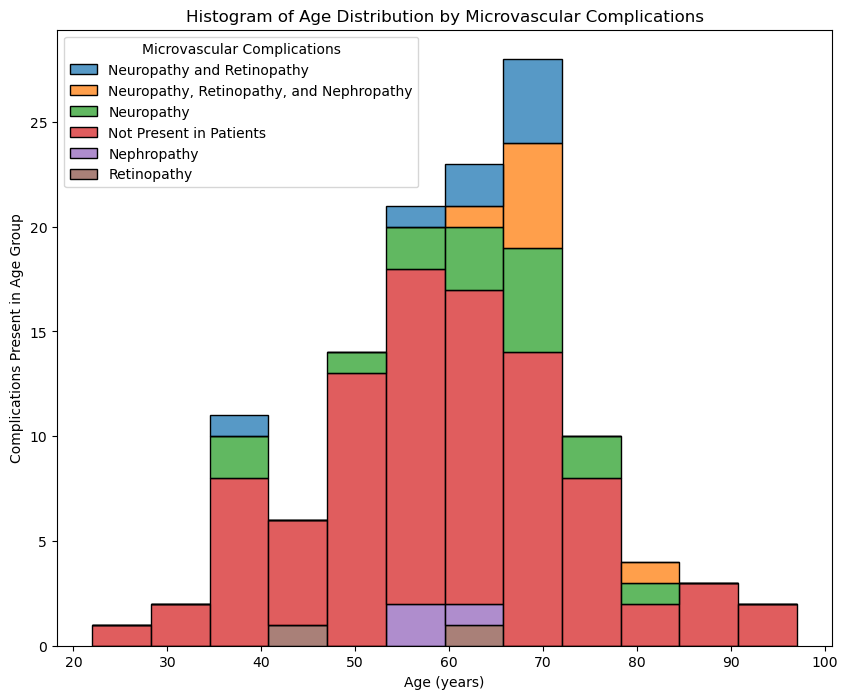

In [33]:
# Visualization 5: Histogram of Age Distribution by Microvascular Complications
plt.figure(figsize=(10, 8))
sns.histplot(data=cd1, x='Age (years)', hue='Microvascular Complications', multiple='stack')
plt.title('Histogram of Age Distribution by Microvascular Complications')
plt.savefig('histogram.png')
plt.ylabel('Complications Present in Age Group')
plt.show()

# What can be stated with this graph is that the youngest and oldest of the population tested had no Microvascular Complications, 
# while the majority of patients 55-70 had most if not all of the issues associated with Microvascular Complications

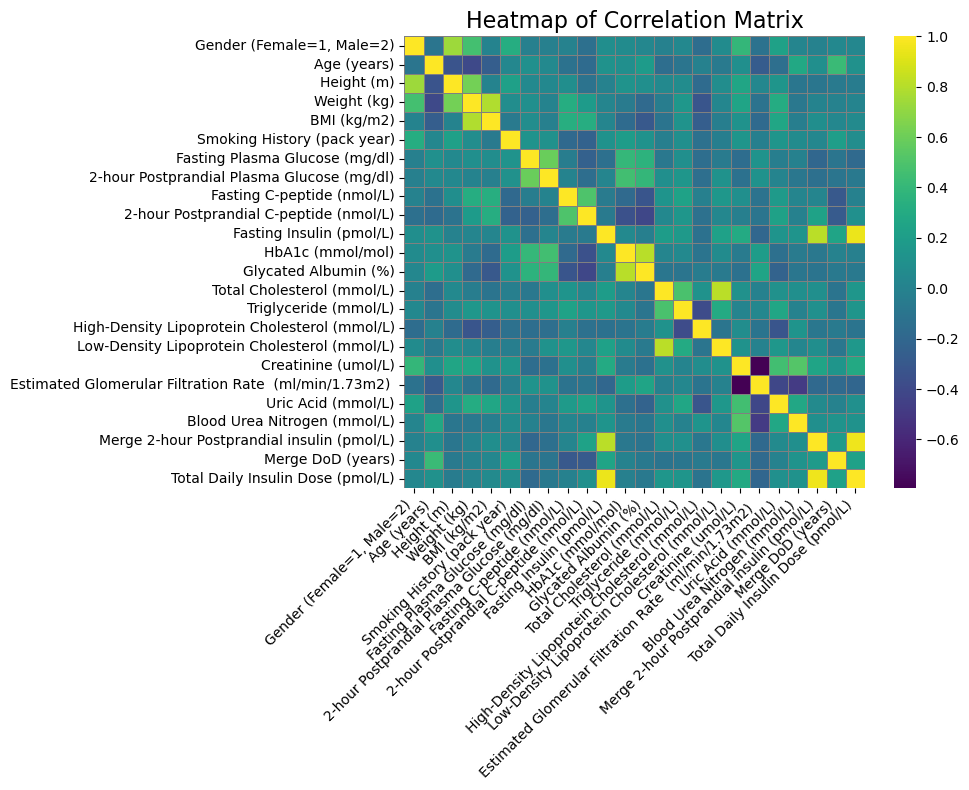

In [34]:
# Visualization 6: Heatmap of Correlation Matrix
# Drop non-numeric columns before calculating the correlation matrix
df_numeric = cd1.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()
# Plot the heatmap of the correlation matrix with enhancements
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='viridis', fmt='.2f', linewidths=0.5, linecolor='gray')
plt.title('Heatmap of Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
#plt.savefig('heatmap_enhanced.png')
plt.show()

# I got rid of the annotations that muddied up the top row, changed the color scheme to be more friendly to those that have color blindness issues.
# The intesting points in this map inclide relations of:
# 

In [35]:
# Convert numeric values in 'Gender (Female=1, Male=2)' column to meaningful labels
cd1['Gender (Female=1, Male=2)'] = cd1['Gender (Female=1, Male=2)'].map({1: 'Female', 2: 'Male'})

In [36]:
# Visualization 8: Stacked Bar Chart of Diabetic Macrovascular Complications by Gender and HbA1c Levels

# Define the bin edges for HbA1c levels
bin_edges = [0, 40, 50, 60, 70, 80, 90, 100, np.inf]
# Create labels for the bins
bin_labels = ['0-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', 'Above 100']
# Create a new column with the HbA1c level bins
cd1['HbA1c Level Range'] = pd.cut(cd1['HbA1c (mmol/mol)'], bins=bin_edges, labels=bin_labels, right=False)
cd1['Gender (Female=1, Male=2)']= cd1['Gender (Female=1, Male=2)'].astype(str)

# Plot the stacked bar chart using the HbA1c level ranges
plt.figure(figsize=(20, 12))
sns.countplot(x='HbA1c Level Range', hue='Gender (Female=1, Male=2)', data=cd1_genderna)
plt.title('Stacked Bar Chart of Diabetic Macrovascular Complications by Gender and HbA1c Levels')
plt.xlabel('HbA1c Level Range (mmol/mol)')
plt.ylabel('Patients Presenting Macrovascular Complications')
plt.xticks(rotation=45)
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.savefig('stackedbarchart.png')
plt.show()

# This graph represnts the quantity of male and female patients that have Macrovascular Complications and shares their HbA1c level range.

NameError: name 'cd1_genderna' is not defined

<Figure size 2000x1200 with 0 Axes>